In [ ]:
#importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive
path=os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
con = sqlite3.connect("database.sqlite")

cur = con.cursor()

In [ ]:
#list all tables in an S`QLite3 database
def sql_fetch(con):
    cursorObj = con.cursor()
    cursorObj.execute('SELECT name from sqlite_master where type= "table"')
    print(cursorObj.fetchall())
sql_fetch(con)

[('Crosswalk2015',), ('Crosswalk2016',), ('PlanAttributes',), ('Network',), ('BenefitsCostSharing',), ('ServiceArea',), ('BusinessRules',), ('Rate',)]


In [ ]:
#benefits cost sharing dataframe
df_Benefits = pd.read_sql_query('SELECT * FROM BenefitsCostSharing where BusinessYear="2016"', con)

In [ ]:
df_Benefits.head(5)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2016,20% Coinsurance after deductible,,20% Coinsurance after deductible,Not Applicable,,Not Applicable,Above EHB,,...,Dollars per Year,,21989AK0030001-00,Yes,68,HIOS,21989AK0030001,AK,AK,4
1,Dental Check-Up for Children,2016,20% Coinsurance after deductible,,20% Coinsurance after deductible,Not Applicable,,Not Applicable,Additional EHB Benefit,,...,Visit(s) per 6 Months,,21989AK0030001-00,Yes,104,HIOS,21989AK0030001,AK,AK,4
2,Basic Dental Care - Child,2016,30% Coinsurance after deductible,,30% Coinsurance after deductible,Not Applicable,,Not Applicable,Additional EHB Benefit,,...,,,21989AK0030001-00,,110,HIOS,21989AK0030001,AK,AK,4
3,Orthodontia - Child,2016,50% Coinsurance after deductible,,50% Coinsurance after deductible,Not Applicable,,Not Applicable,Additional EHB Benefit,,...,,,21989AK0030001-00,,111,HIOS,21989AK0030001,AK,AK,4
4,Major Dental Care - Child,2016,50% Coinsurance after deductible,,50% Coinsurance after deductible,Not Applicable,,Not Applicable,Additional EHB Benefit,,...,,,21989AK0030001-00,,112,HIOS,21989AK0030001,AK,AK,4


In [ ]:
df_Business = pd.read_sql_query('SELECT * FROM BusinessRules where BusinessYear="2016"', con)

In [ ]:
df_Business.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,TIN,ProductId,StandardComponentId,...,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,CohabitationRule,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK009,21989AK0090001,...,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",15,SHOP (Small Group),Yes
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK009,21989AK0090002,...,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",15,SHOP (Small Group),Yes
2,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK010,21989AK0100001,...,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",16,SHOP (Small Group),Yes
3,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK010,21989AK0100002,...,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",16,SHOP (Small Group),Yes
4,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK011,21989AK0110001,...,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",17,SHOP (Small Group),Yes


In [ ]:
df_Network = pd.read_sql_query('SELECT * FROM Network where BusinessYear="2016"', con)

In [ ]:
df_Network.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,NetworkName,NetworkId,NetworkURL,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,Delta Dental Premier,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,,
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,Delta Dental PPO,AKN002,https://www.modahealth.com/ProviderSearch/face...,14,,
2,2016,AK,38344,HIOS,10,2015-08-25 05:06:23,38344,AK,HeritagePlus and Dental,AKN001,https://premera.vitalschoice.com/#/?ci=premera...,13,,
3,2016,AK,38344,HIOS,10,2015-08-25 05:06:23,38344,AK,Dental,AKN002,https://premera.vitalschoice.com/#/?ci=premera...,14,,
4,2016,AK,38344,HIOS,10,2015-08-25 05:06:23,38344,AK,HeritagePlus,AKN003,https://premera.vitalschoice.com/#/?ci=premera...,15,,


In [ ]:
df_PlanAttr = pd.read_sql_query('SELECT * FROM PlanAttributes where BusinessYear="2016"', con)


In [ ]:
df_PlanAttr.head(5)

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,,0,0,1,2016,Standard Low Off Exchange Plan,Allows Adult and Child-Only,,No,,...,,,,,93-0438772,,https://www.modahealth.com/pdfs/plans/individu...,,4,
1,,0,0,1,2016,Standard High Off Exchange Plan,Allows Adult and Child-Only,,No,,...,,,,,93-0438772,,https://www.modahealth.com/pdfs/ben_sum/AK/160...,,4,
2,,0,0,1,2016,Standard Low On Exchange Plan,Allows Adult and Child-Only,,No,,...,,,,,93-0438772,,https://www.modahealth.com/pdfs/plans/individu...,,4,
3,,0,0,2,2016,Standard High Off Exchange Plan,Allows Adult and Child-Only,,No,,...,,,,,93-0438772,,https://www.modahealth.com/pdfs/plans/individu...,,4,
4,,0,0,2,2016,Standard High Off Exchange Plan,Allows Adult and Child-Only,,No,,...,,,,,93-0438772,,https://www.modahealth.com/pdfs/ben_sum/AK/160...,,4,


In [ ]:
df_Rate = pd.read_sql_query('SELECT * FROM Rate where BusinessYear="2016"', con)

In [ ]:
df_Rate.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-01-01,2016-12-31,...,43.00,,,,,,,,,14
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-01-01,2016-03-31,...,50.67,,100.33,116.04,116.04,116.04,117.86,117.86,117.86,14
2,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-04-01,2016-06-30,...,51.36,,101.7,117.62,117.62,117.62,180.28,180.28,180.28,14
3,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-01-01,2016-03-31,...,61.00,,,,,,,,,14
4,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-04-01,2016-06-30,...,62.00,,,,,,,,,14


In [ ]:
df_Service = pd.read_sql_query('SELECT * FROM ServiceArea where BusinessYear="2016"', con)

In [ ]:
df_Service.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,ServiceAreaId,ServiceAreaName,CoverEntireState,County,PartialCounty,ZipCodes,PartialCountyJustification,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS003,Monmouth/Centra State,No,34029,Yes,"08527, 08533, 08701",10191-Partial County-NJS003-Monmouth.pdf,18,,
1,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS004,PCMH,No,34001,No,,,19,,
2,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS004,PCMH,No,34003,No,,,20,,
3,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS004,PCMH,No,34005,No,,,21,,
4,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS004,PCMH,No,34007,No,,,22,,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fca8d71f0>,
      dtype=object)

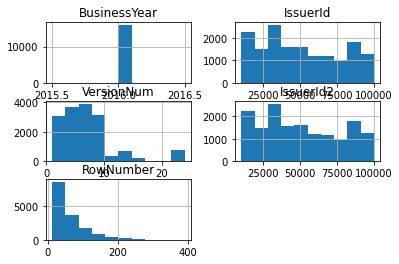

In [ ]:
df_Service.hist()

In [ ]:
df_Business.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'TIN', 'ProductId', 'StandardComponentId',
       'EnrolleeContractRateDeterminationRule',
       'TwoParentFamilyMaxDependentsRule',
       'SingleParentFamilyMaxDependentsRule', 'DependentMaximumAgRule',
       'ChildrenOnlyContractMaxChildrenRule',
       'DomesticPartnerAsSpouseIndicator', 'SameSexPartnerAsSpouseIndicator',
       'AgeDeterminationRule', 'MinimumTobaccoFreeMonthsRule',
       'CohabitationRule', 'RowNumber', 'MarketCoverage', 'DentalOnlyPlan'],
      dtype='object')

## Which state has better rate plans for Individualas

In [ ]:
df_singlerate=pd.read_sql_query('SELECT StateCode, avg(IndividualRate) FROM Rate Group by StateCode Order by avg(IndividualRate)', con)

In [ ]:
df_singlerate.head(1)

,StateCode,avg(IndividualRate)
0,HI,256.341476


In [ ]:
df_singlerate.tail(1)

,StateCode,avg(IndividualRate)
38,ID,18457.376815


In [ ]:
df_singlerate

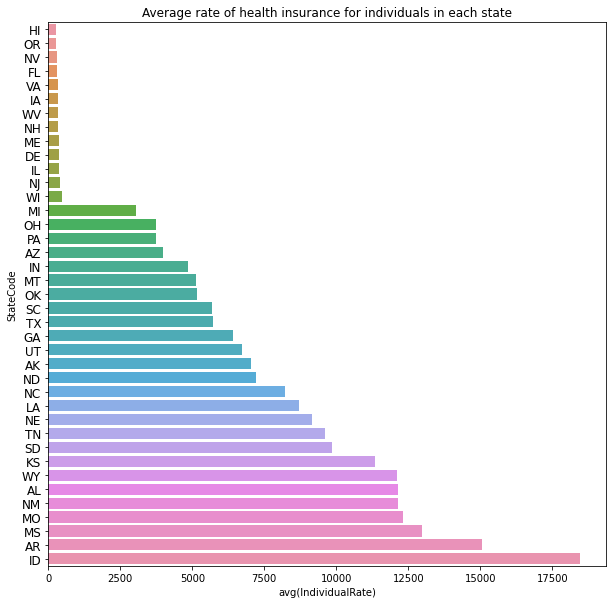

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Average rate of health insurance for individuals in each state")
ax.set_yticklabels(df_singlerate['StateCode'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_singlerate['StateCode'],x=df_singlerate['avg(IndividualRate)'])
plt.show()

## Which state has better rate plans for couples

In [ ]:
df_couplerate=pd.read_sql_query("SELECT StateCode, avg(Couple) FROM Rate WHERE Age='Family Option' Group by StateCode Order by avg(Couple)", con)

In [ ]:
df_couplerate.head(10)

,StateCode,avg(Couple)
0,FL,37.619833
1,WV,38.357045
2,AL,39.482981
3,TX,39.979740
4,MT,41.388750
5,ME,42.266953
6,IA,43.865027
7,PA,44.143988
8,GA,44.308034
9,KS,45.068815


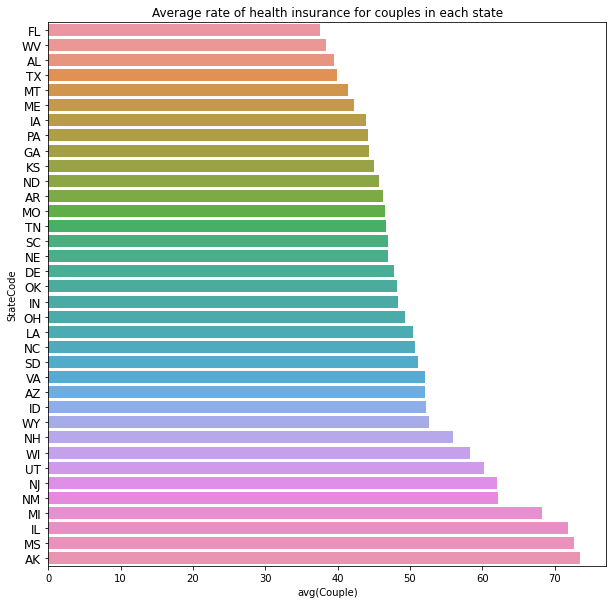

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Average rate of health insurance for couples in each state")
ax.set_yticklabels(df_couplerate['StateCode'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_couplerate['StateCode'],x=df_couplerate['avg(Couple)'])
plt.show()

## Details of Florida for couples

In [ ]:
df_test=pd.read_sql_query("SELECT StateCode, Age, IndividualRate, Couple FROM Rate WHERE StateCode='FL'", con)

In [ ]:
df_test.head(10)

,StateCode,Age,IndividualRate,Couple
0,FL,0-20,22.38,
1,FL,Family Option,21.98,44
2,FL,Family Option,22.29,44.63
3,FL,21,99.00,
4,FL,22,99.00,
5,FL,Family Option,20.68,41.4
6,FL,Family Option,22.29,44.63
7,FL,23,99.00,
8,FL,24,99.00,
9,FL,Family Option,24.64,49.34


## Details of Hawaii for couples

In [ ]:
df_test1=pd.read_sql_query("SELECT StateCode, Age, IndividualRate, Couple FROM Rate WHERE StateCode='HI'", con)

In [ ]:
df_test1.head(10)

,StateCode,Age,IndividualRate,Couple
0,HI,0-20,46.59,
1,HI,0-20,46.59,
2,HI,0-20,56.12,
3,HI,0-20,56.12,
4,HI,21,51.59,
5,HI,21,62.07,
6,HI,21,35.30,
7,HI,21,49.09,
8,HI,22,49.09,
9,HI,22,35.30,


## which state provides more benifits

In [ ]:
df_Benefits_state_wise_count=pd.read_sql_query('SELECT StateCode, count(DISTINCT BenefitName) FROM BenefitsCostSharing where BusinessYear="2016" Group by StateCode Order by count(DISTINCT BenefitName)', con)

In [ ]:
df_Benefits_state_wise_count.tail(1)

,StateCode,count(DISTINCT BenefitName)
37,MI,145


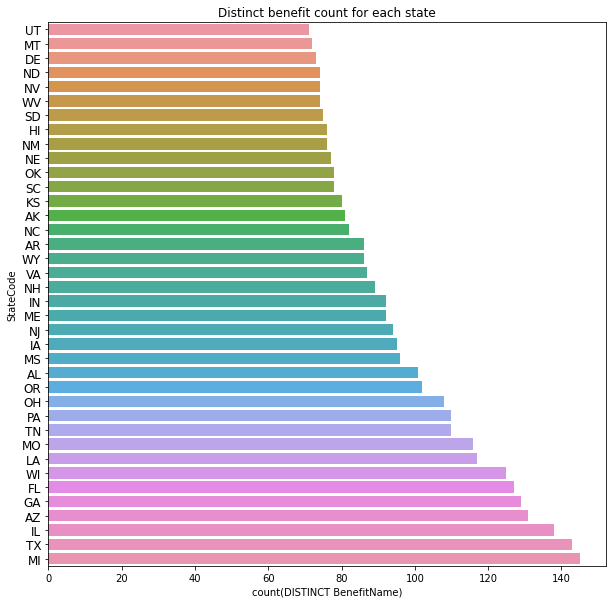

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Distinct benefit count for each state")
ax.set_yticklabels(df_Benefits_state_wise_count['StateCode'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_Benefits_state_wise_count['StateCode'],x=df_Benefits_state_wise_count['count(DISTINCT BenefitName)'])
plt.show()

## Displaying the unique Benifit values name

In [ ]:
df_Benefits_name=pd.read_sql_query('SELECT DISTINCT BenefitName FROM BenefitsCostSharing where BusinessYear="2016"', con)

In [ ]:
df_Benefits_name

,BenefitName
0,Routine Dental Services (Adult)
1,Dental Check-Up for Children
2,Basic Dental Care - Child
3,Orthodontia - Child
4,Major Dental Care - Child
...,...
424,All Other Orthodontia - Child
425,Routine Exams and X-rays - Adult
426,Annual Coverage Maximum for Adult Dental Benefits
427,Injectables and other drugs administered in a ...


#What state provides the most mandatory benefits

In [ ]:
df_mandatorybencount=pd.read_sql_query("SELECT StateCode, IsStateMandate, count(DISTINCT BenefitName) FROM BenefitsCostSharing WHERE IsStateMandate = 'Yes' GROUP BY StateCode ORDER BY count(DISTINCT BenefitName)", con)

In [ ]:
df_mandatorybencount.tail(1)

,StateCode,IsStateMandate,count(DISTINCT BenefitName)
38,NJ,Yes,24


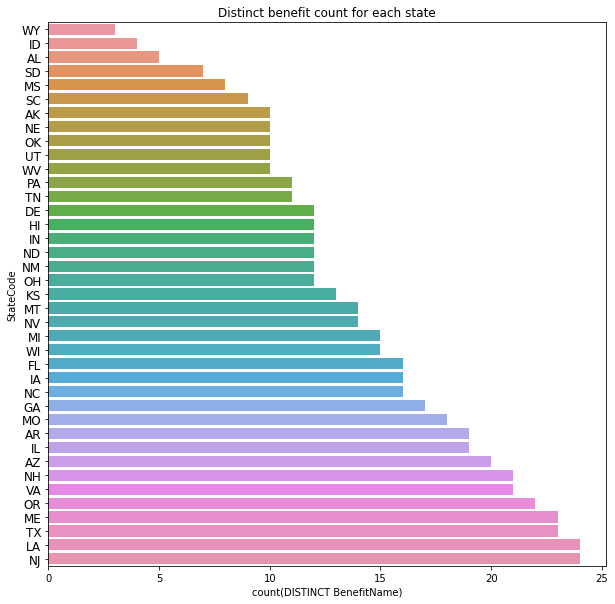

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Distinct benefit count for each state")
ax.set_yticklabels(df_mandatorybencount['StateCode'], rotation='horizontal', fontsize='large')
g = sns.barplot(y = df_mandatorybencount['StateCode'],x=df_mandatorybencount['count(DISTINCT BenefitName)'])
plt.show()

#Conclusion

In [ ]:
#Merge all the dataframes
df_merge1=pd.merge(df_singlerate, df_couplerate, on='StateCode', how='inner')
df_merge2=pd.merge(df_merge1, df_Benefits_state_wise_count, on='StateCode', how='inner')
df_merge_Final=pd.merge(df_merge2, df_mandatorybencount, on='StateCode', how='inner')
df_merge_Final.drop(columns=['IsStateMandate'], inplace=True)
df_merge_Final.columns=['StateCode', 'avg(IndividualRate)', 'avg(Couple)', 'ben_count', 'mandatory_ben_count']

In [ ]:
#Normalize each column
df_merge_Final['avg(IndividualRate)'] = (df_merge_Final['avg(IndividualRate)'] - df_merge_Final['avg(IndividualRate)'].min()) / (df_merge_Final['avg(IndividualRate)'].max() - df_merge_Final['avg(IndividualRate)'].min())
df_merge_Final['avg(Couple)'] = (df_merge_Final['avg(Couple)'] - df_merge_Final['avg(Couple)'].min()) / (df_merge_Final['avg(Couple)'].max() - df_merge_Final['avg(Couple)'].min())
df_merge_Final['ben_count'] = (df_merge_Final['ben_count'] - df_merge_Final['ben_count'].min()) / (df_merge_Final['ben_count'].max() - df_merge_Final['ben_count'].min())
df_merge_Final['mandatory_ben_count'] = (df_merge_Final['mandatory_ben_count'] - df_merge_Final['mandatory_ben_count'].min()) / (df_merge_Final['mandatory_ben_count'].max() - df_merge_Final['mandatory_ben_count'].min())

In [ ]:
#Change Individual and Couple Rate Column so 1 is best
def fix_scores(score):
    return 1-score
df_merge_Final['avg(IndividualRate)'] = df_merge_Final['avg(IndividualRate)'].apply(fix_scores)

df_merge_Final['avg(Couple)'] = df_merge_Final['avg(Couple)'].apply(fix_scores)

In [ ]:
#Add a combined score column and normalize
df_merge_Final['Combined_Score']=(df_merge_Final['avg(IndividualRate)'])+(df_merge_Final['avg(Couple)'])+(df_merge_Final['ben_count'])+(df_merge_Final['mandatory_ben_count'])
df_merge_Final['Combined_Score'] = (df_merge_Final['Combined_Score'] - df_merge_Final['Combined_Score'].min()) / (df_merge_Final['Combined_Score'].max() - df_merge_Final['Combined_Score'].min())
df_merge_Final.sort_values(by=['Combined_Score'],inplace=True)
df_merge_Final

,StateCode,avg(IndividualRate),avg(Couple),ben_count,mandatory_ben_count,Combined_Score
33,MS,0.141766,0.022383,0.337838,0.238095,0.000000
29,WY,0.200949,0.581763,0.202703,0.000000,0.089092
31,NM,0.197901,0.314276,0.067568,0.428571,0.097409
21,AK,0.545078,0.000000,0.135135,0.333333,0.099308
27,SD,0.354542,0.623453,0.054054,0.190476,0.175198
20,UT,0.566356,0.367945,0.000000,0.333333,0.191579
25,NE,0.400697,0.739532,0.081081,0.333333,0.295806
28,KS,0.252232,0.792315,0.121622,0.476190,0.327660
30,AL,0.199042,0.948054,0.405405,0.095238,0.329613
34,AR,0.000000,0.758274,0.202703,0.761905,0.356901


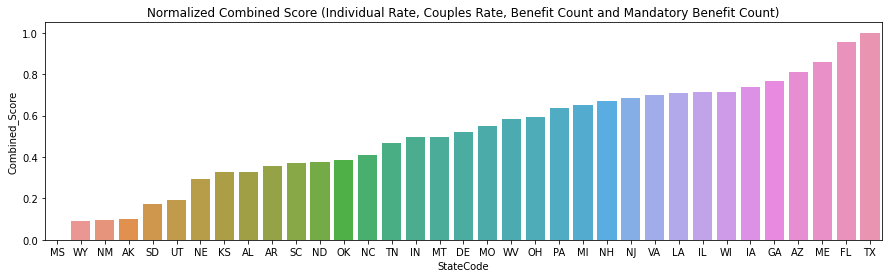

In [ ]:
f, ax = plt.subplots(figsize=(15, 4))
plt.title("Normalized Combined Score (Individual Rate, Couples Rate, Benefit Count and Mandatory Benefit Count)")
#ax.set_yticklabels(df_merge_Final['Combined_Score'], fontsize='large')
g = sns.barplot(x=df_merge_Final['StateCode'], y=df_merge_Final['Combined_Score'])
plt.show()